<a href="https://colab.research.google.com/github/kelvinfoo123/Final-Year-Project/blob/main/Iris_Neural_Network_(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import and basic look at data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import torch 
import torch.nn as nn 

%matplotlib inline 

In [33]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.shape

(150, 6)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## **Data preprocessing**

In [34]:
# Convert species to numeric variables 

df['Species'] = df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [35]:
# Drop id column 

df.drop(['Id'], axis = 1, inplace = True)

In [11]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# Split X and y 
X = df.drop(['Species'], axis = 1).values
y = df['Species'].values 

# Train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale X 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Convert numpy array to torch tensor 

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## **Building neural network**

In [38]:
class NeuralNetwork(nn.Module): 
  def __init__(self, input_dim, output_dim): 
    super(NeuralNetwork, self).__init__()
    self.input_layer = nn.Linear(input_dim, 128)
    self.hidden_layer = nn.Linear(128, 64)
    self.output_layer = nn.Linear(64, output_dim)
    self.relu = nn.ReLU()
  
  def forward(self, x): 
    out = self.relu(self.input_layer(x))
    out = self.relu(self.hidden_layer(out))
    out = self.output_layer(out)
    return out 

In [39]:
input_dim = 4
output_dim = 3
model = NeuralNetwork(input_dim, output_dim)

In [40]:
learning_rate = 0.01 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [41]:
def train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_loss, test_loss): 
  for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward feed 
    output_train = model(X_train)

    # Calculate loss 
    loss_train = criterion(output_train, y_train)

    # Backward propagation 
    loss_train.backward()

    # Update weights 
    optimizer.step()

    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [42]:
num_epochs = 500
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [43]:
train_network(model, optimizer, criterion, X_train, y_train, X_test, y_test, num_epochs, train_losses, test_losses)

Epoch 50/500, Train Loss: 0.0280, Test Loss: 0.0027
Epoch 100/500, Train Loss: 0.0013, Test Loss: 0.1284
Epoch 150/500, Train Loss: 0.0004, Test Loss: 0.1793
Epoch 200/500, Train Loss: 0.0002, Test Loss: 0.1879
Epoch 250/500, Train Loss: 0.0001, Test Loss: 0.1908
Epoch 300/500, Train Loss: 0.0001, Test Loss: 0.1925
Epoch 350/500, Train Loss: 0.0001, Test Loss: 0.1944
Epoch 400/500, Train Loss: 0.0000, Test Loss: 0.2026
Epoch 450/500, Train Loss: 0.0000, Test Loss: 0.2027
Epoch 500/500, Train Loss: 0.0000, Test Loss: 0.2050


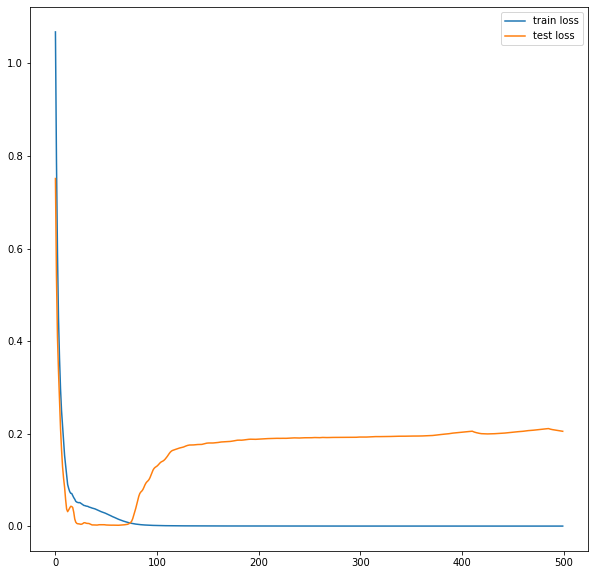

In [44]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

##**Evaluation of model**

In [45]:
predictions_train = []
predictions_test = []

with torch.no_grad(): 
  predictions_train = model(X_train)
  predictions_test = model(X_test)

In [47]:
def accuracy(pred_arr, original_arr): 
  pred_arr = pred_arr.numpy()
  original_arr = original_arr.numpy()
  final_pred = []

  for i in range(len(pred_arr)): 
    final_pred.append(np.argmax(pred_arr[i]))
  final_pred = np.array(final_pred)
  count = 0 

  for i in range(len(original_arr)): 
    if final_pred[i] == original_arr[i]: 
      count += 1 
  return count / len(final_pred)

In [48]:
train_acc = accuracy(predictions_train, y_train)
test_acc = accuracy(predictions_test, y_test)

In [49]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 100.0
Test Accuracy: 97.778
